In [7]:
# !pip install tweepy

In [4]:
# !pip install textblob

In [81]:
# General:
import tweepy           # To consume Twitter's API
import pandas as pd     # To handle data
import numpy as np      # For numerical computation

# For plotting and visualization:
from IPython.display import display
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [95]:
# keras-tensorflow packages
from keras import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, load_model
from keras.layers import Dense, Embedding, LSTM, Bidirectional, SpatialDropout1D, Dropout
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical
import re

In [56]:
from sklearn.metrics import confusion_matrix as cf
from sklearn.metrics import accuracy_score

### Load The Reviews

In [14]:
# load the reviews
enc='latin-1'
positive_reviews = [line.rstrip('\n') for line in open('data/sentimentdata/rt-polarity.pos', encoding=enc)]
negative_reviews = [line.rstrip('\n') for line in open('data/sentimentdata/rt-polarity.neg', encoding=enc)]

In [16]:
positive_reviews[0]

'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal . '

In [27]:
negative_reviews[0]

'simplistic , silly and tedious . '

### Compile Sentiments To One Dataframe

In [25]:
sentiments_pos = pd.DataFrame(positive_reviews, columns = ['Text'])
sentiments_pos['Sentiment'] = 1

sentiments_neg = pd.DataFrame(negative_reviews, columns = ['Text'])
sentiments_neg['Sentiment'] = 0

sentiments = pd.concat([sentiments_pos, sentiments_neg])


In [37]:
tokenizer = Tokenizer(num_words=2000, split=' ')

tokenizer.fit_on_texts(sentiments['Text'])
X = tokenizer.texts_to_sequences(sentiments['Text'])
X = pad_sequences(X)
y = sentiments['Sentiment']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Deep Leearning Approach using Keras-Tensorflow
In Keras, we can define our deep network as a sequence of layers. We need to have three layers:

- Embedding Layer - modifies the integer representation of words into dense vectors  
- Bidirectional LSTM Layer - connects two hidden layers of opposite directions to the same output  
- Dense Layer - output layer with softmax activation  

In [116]:
# Deep Learning Architecture Parameters
input_dim = 2000
output_dim = 128
dropout = 0.8
LSTM_units = 256

# Model fit Parameters
batch_size = 200
epochs = 7
val_split = 0.3
dense_out = 2

In [117]:
model = Sequential()

model.add( Embedding(input_dim=input_dim, output_dim = output_dim, input_length = X.shape[1]))
model.add(SpatialDropout1D(dropout))
model.add( Bidirectional( LSTM(LSTM_units)))
model.add(Dropout(dropout))
model.add( Dense(dense_out, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


### Architecture

In [118]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 46, 128)           256000    
_________________________________________________________________
spatial_dropout1d_9 (Spatial (None, 46, 128)           0         
_________________________________________________________________
bidirectional_12 (Bidirectio (None, 512)               788480    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 1026      
Total params: 1,045,506
Trainable params: 1,045,506
Non-trainable params: 0
_________________________________________________________________


Train on 5970 samples, validate on 2559 samples
Epoch 1/7
5970/5970 [==============================] - 31s 5ms/step - loss: 0.6944 - acc: 0.5126 - val_loss: 0.6910 - val_acc: 0.4900
Epoch 2/7
5970/5970 [==============================] - 27s 4ms/step - loss: 0.6813 - acc: 0.5588 - val_loss: 0.6514 - val_acc: 0.6342
Epoch 3/7
5970/5970 [==============================] - 30s 5ms/step - loss: 0.6389 - acc: 0.6472 - val_loss: 0.6103 - val_acc: 0.6733
Epoch 4/7
5970/5970 [==============================] - 28s 5ms/step - loss: 0.5541 - acc: 0.7209 - val_loss: 0.5582 - val_acc: 0.7151
Epoch 5/7
5970/5970 [==============================] - 34s 6ms/step - loss: 0.4997 - acc: 0.7710 - val_loss: 0.5340 - val_acc: 0.7323
Epoch 6/7
5970/5970 [==============================] - 32s 5ms/step - loss: 0.4662 - acc: 0.7863 - val_loss: 0.5399 - val_acc: 0.7319
Epoch 7/7
5970/5970 [==============================] - 30s 5ms/step - loss: 0.4395 - acc: 0.7978 - val_loss: 0.5331 - val_acc: 0.7440
dict_keys(['va

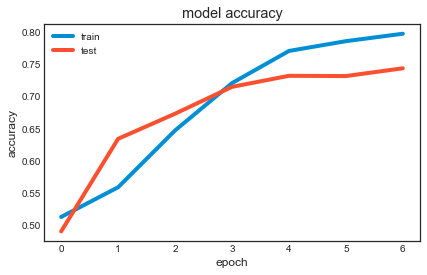

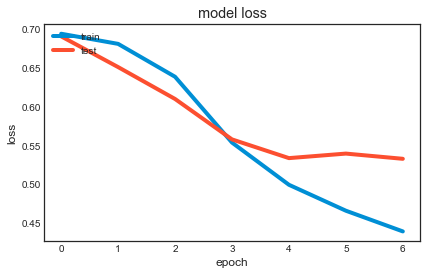

In [119]:

history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_split=val_split)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [120]:
y_pred = model.predict(X_test)

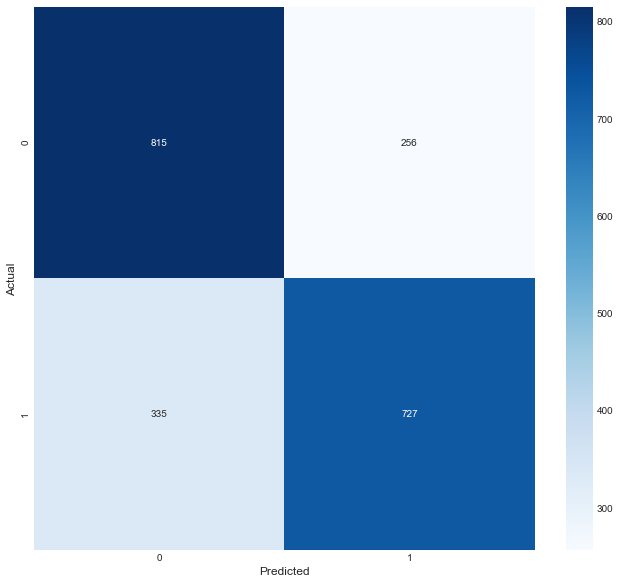

In [121]:
conf_mat = cf(y_test, np.argmax(y_pred, axis = 1))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [122]:
accuracy_score(y_test,np.argmax(y_pred, axis = 1))

0.7229254571026723